# Homework 7
### Landon Wright

##### The first part of this document is me setting up code to make the last part simple.

In [282]:
using Plots
f(x) = x[1].^4 - 2 .* x[2] .* x[1].^2 + x[2].^2 + x[1].^2 - 2.*x[1] + 5
g(x) = -(x[1] + 0.25).^2 + 0.75.*x[2] #>= 0
∇f(x) = [4x[1]^3 - 4 * x[2] * x[1] + 2 * x[1] - 2; -2 * x[1]^2 + 2 * x[2]]
∇g(x) = [-2x[1] - 0.5; 0.75]
function pen(x, λ)
    f_val = f(x)
    g_val = g(x)
    if g_val < 0
        return f_val + λ * abs(g_val)
    else
        return f_val
    end 
end
function BFGS(h, γ, Δx)
    t1 = h
    t2 = (γ * γ') / (γ' * Δx)
    t3 = (h * Δx * Δx' * h) / (Δx' * h * Δx)
#     println(t1,
#     t2,
#     t3)
    return t1 + t2 - t3
end

x0  = [-1, 4]
f0 = f(x0)
g0 = g(x0)
∇f0 = ∇f(x0)
∇g0 = ∇g(x0)
p0 = pen(x0, 0)
println("f⁰ = $f0 \ng⁰ = $g0 \n∇f⁰ = $∇f0 \n∇g⁰ = $∇g0\np⁰ = $p0")

f⁰ = 17 
g⁰ = 2.4375 
∇f⁰ = [8, 6] 
∇g⁰ = [1.5, 0.75]
p⁰ = 17


In [283]:
a = [1 0 -1.5; 0 1 -0.75; 1.5 0.75 0]
b = [-8; -6; -2.4375]
c1 = a\b
Δx = c1[1:2]
λ1 = c1[3]
x1 = x0 + Δx
f1 = f(x1)
g1 = g(x1)
∇f1 = ∇f(x1)
∇g1 = ∇g(x1)
p1 = pen(x1, c1[3])
println("x1 = $x1
λ1 = $λ1
f1 = $f1
g1 = $g1
∇f1 = $∇f1
∇g1 = $∇g1
p1 = $p1")


    
hess = BFGS([1 0; 0 1], [-21; -7], Δx)


x1 = [-1.5, 1.75]
λ1 = 5.0
f1 = 10.5
g1 = -0.25
∇f1 = [-8.0, -1.0]
∇g1 = [2.5, 0.75]
p1 = 11.75


2×2 Array{Float64,2}:
 17.7529   5.38824
  5.38824  1.91373

In [284]:
a = zeros(3, 3)
a[1:2, 1:2] = hess
a[1, 3] = -∇g1[1]
a[2, 3] = -∇g1[2]
a[3, 1] = ∇g1[1]
a[3, 2] = ∇g1[2]
a[3, 3] = 0
a
b[1] = -∇f1[1]
b[2] = -∇f1[2]
b[3] = -g1
c2 = a\b

a2 = a[1:2, 1:2]
b2 = b[1:2]
c2 = a2\b2
λ2 = 0

x2 = x1 + c2
p2 = pen(x2, 0)
x2 = x1 + 0.5 * c2
p2 = pen(x2, 0)
f2 = f(x2)
g2 = g(x2)
∇f2 = ∇f(x2)
∇g2 = ∇g(x2)
println("x2 = $x2
λ2 = $λ2
f2 = $f2
g2 = $g2
∇f2 = $∇f2
∇g2 = $∇g2
p2 = $p2")

x2 = [-0.496032, -0.815476]
λ2 = 0
f2 = 7.364943515867029
g2 = -0.6721387629125684
∇f2 = [-5.09826, -2.12305]
∇g2 = [0.492063, 0.75]
p2 = 7.364943515867029


### Perform the update for the lagrangian hessian for iteration 3

In [285]:
∇l1 = ∇f1 - λ2 * ∇g1
∇l2 = ∇f2 - λ2 * ∇g2
γ1 = ∇l2 - ∇l1
Δx1 = x2 - x1
hess2 = BFGS(hess, γ1, Δx1)

2×2 Array{Float64,2}:
 13.352    4.09407
  4.09407  2.03992

We now perform the update for the next iteration (3)

In [286]:
a = zeros(3, 3)
a[1:2, 1:2] = hess2
a[1, 3] = -∇g2[1]
a[2, 3] = -∇g2[2]
a[3, 1] = ∇g2[1]
a[3, 2] = ∇g2[2]
a[3, 3] = 0
a
b[1] = -∇f2[1]
b[2] = -∇f2[2]
b[3] = -g2
c3 = a\b

λ3 = c3[3]
x3 = x2 + c3[1:2]
p3 = pen(x3, c3[3])
f3 = f(x3)
g3 = g(x3)
∇f3 = ∇f(x3)
∇g3 = ∇g(x3)
println("x3 = $x3
λ3 = $λ3
f3 = $f3
g3 = $g3
∇f3 = $∇f3
∇g3 = $∇g3
p3 = $p3")

x3 = [-0.356526, -0.0108186]
λ3 = 0.11938042184196915
f3 = 5.859187854408041
g3 = -0.01946180129956806
∇f3 = [-2.90975, -0.275859]
∇g3 = [0.213052, 0.75]
p3 = 5.861511212456988


We now perform the hessian update

In [287]:
∇l1 = ∇f2 - λ3 * ∇g2
∇l2 = ∇f3 - λ3 * ∇g3
γ2 = ∇l2 - ∇l1
Δx2 = x3 - x2
hess3 = BFGS(hess2, γ2, Δx2)

2×2 Array{Float64,2}:
 5.46139  1.81434
 1.81434  1.98106

We now perform the fourth iteration

In [288]:
a = zeros(3, 3)
∇g_cur = ∇g3
∇f_cur = ∇f3
a[1:2, 1:2] = hess3
a[1, 3] = -∇g_cur[1]
a[2, 3] = -∇g_cur[2]
a[3, 1] = ∇g_cur[1]
a[3, 2] = ∇g_cur[2]
a[3, 3] = 0
a
b[1] = -∇f_cur[1]
b[2] = -∇f_cur[2]
b[3] = -g3
c4 = a\b

λ4 = c4[3]
x4 = x3 + c4[1:2]
p4 = pen(x4, c4[3])
f4 = f(x4)
g4 = g(x4)
∇f4 = ∇f(x4)
∇g4 = ∇g(x4)
println("x4 = $x4
λ4 = $λ4
f4 = $f4
g4 = $g4
∇f4 = $∇f4
∇g4 = $∇g4
p4 = $p4")

x4 = [0.253198, -0.158074]
λ4 = 0.7182189754054158
f4 = 4.607078778381921
g4 = -0.37176331579725186
∇f4 = [-1.26858, -0.444366]
∇g4 = [-1.0064, 0.75]
p4 = 4.874086246147144


Perform the BFGS update for iteration 5

In [289]:
∇l1 = ∇f3 - λ4 * ∇g3
∇l2 = ∇f4 - λ4 * ∇g4
γ3 = ∇l2 - ∇l1
Δx3 = x4 - x3
hess4 = BFGS(hess3, γ3, Δx3)

2×2 Array{Float64,2}:
 4.15583  0.11479
 0.11479  1.61962

Perform iteration 5

In [290]:
a = zeros(3, 3)
∇g_cur = ∇g4
∇f_cur = ∇f4
a[1:2, 1:2] = hess4
a[1, 3] = -∇g_cur[1]
a[2, 3] = -∇g_cur[2]
a[3, 1] = ∇g_cur[1]
a[3, 2] = ∇g_cur[2]
a[3, 3] = 0
a
b[1] = -∇f_cur[1]
b[2] = -∇f_cur[2]
b[3] = -g4
c5 = a\b

λ5 = c5[3]
x5 = x4 + c5[1:2]
p5 = pen(x5, c5[3])
f5 = f(x5)
g5 = g(x5)
∇f5 = ∇f(x5)
∇g5 = ∇g(x5)
println("x5 = $x5
λ5 = $λ5
f5 = $f5
g5 = $g5
∇f5 = $∇f5
∇g5 = $∇g5
p5 = $p5")

x5 = [0.352205, 0.470464]
λ5 = 0.7799858903614741
f5 = 4.53964289990917
g5 = -0.009802349649705555
∇f5 = [-1.78363, 0.692832]
∇g5 = [-1.20441, 0.75]
p5 = 4.54728859432833


Perform the BFGS update

In [291]:
∇l1 = ∇f4 - λ5 * ∇g4
∇l2 = ∇f5 - λ5 * ∇g5
γ4 = ∇l2 - ∇l1
Δx4 = x5 - x4
hess5 = BFGS(hess4, γ4, Δx4)

2×2 Array{Float64,2}:
  4.01074  -1.20548
 -1.20548   1.99916

Perform iteration 6

In [292]:
a = zeros(3, 3)
∇g_cur = ∇g5
∇f_cur = ∇f5
a[1:2, 1:2] = hess5
a[1, 3] = -∇g_cur[1]
a[2, 3] = -∇g_cur[2]
a[3, 1] = ∇g_cur[1]
a[3, 2] = ∇g_cur[2]
a[3, 3] = 0
a
b[1] = -∇f_cur[1]
b[2] = -∇f_cur[2]
b[3] = -g5
c6 = a\b

λ6 = c6[3]
x6 = x5 + c6[1:2]
p6 = pen(x6, c6[3])
f6 = f(x6)
g6 = g(x6)
∇f6 = ∇f(x6)
∇g6 = ∇g(x6)
println("x6 = $x6
λ6 = $λ6
f6 = $f6
g6 = $g6
∇f6 = $∇f6
∇g6 = $∇g6
p6 = $p6")

x6 = [0.473994, 0.679113]
λ6 = 1.284185632121459
f6 = 4.483200448250253
g6 = -0.01483260680208942
∇f6 = [-1.91362, 0.908885]
∇g6 = [-1.44799, 0.75]
p6 = 4.502248268792403


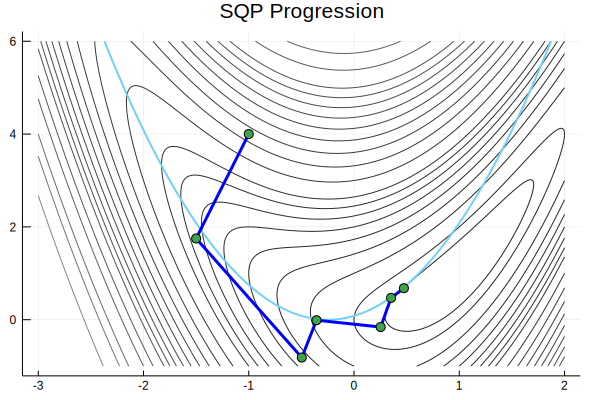

In [293]:
x = -3:0.01:2
y = -1:0.01:6
X = repmat(x',length(y),1)
Y = repmat(y,1,length(x))
Z = f([X, Y])
G = g([X, Y])
c_plot = contour(x,y,Z, levels=[4.5, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 34, 38, 45, 50, 60], 
    fill = false, color = :grays, legend = false)

contour!(c_plot, x, y, G, levels=[0], color=:isolum, linewidth=2)

x_vals = [x0'; x1';x2';x3';x4';x5';x6']
plot!(c_plot, x_vals[:,1], x_vals[:,2], linecolor=:blue, linewidth=3, marker=:circle, markersize=5,
    title="SQP Progression")


### Problem 2

In [294]:
x0 = [-1; 4]
f0 = f(x0)
∇f0 = ∇f(x0)
g0 = g(x0)
∇g0 = ∇g(x0)
hess0 = eye(2)
μ0 = 5
s0 = g0
λ0 = 2
p0 = pen(x0, 0)
println(p0)

a = zeros(4,4)
a[1:2, 1:2] = hess0
a[3,3] = λ0
a[1:2, 4] = -∇g0
a[4, 1:2] = ∇g0'
a[3, 4] = s0
a[4, 3] = -1

b = zeros(4, 1)
b[1:2] = ∇f0 - λ0 * ∇g0
b[3] = s0 * λ0 - μ0
b[4] = g0 - s0

c0 = a\-b

17


4×1 Array{Float64,2}:
 -0.930233
 -2.46512 
 -3.24419 
  2.71318 

In [295]:
scale = 0.748
x1 = x0 + scale * c0[1:2]
s1 = s0 + scale * c0[3]
λ1 = λ0 + c0[4]
f1 = f(x1)
∇f1 = ∇f(x1)
g1 = g(x1)
∇g1 = ∇g(x1)
p1 = pen(x1, λ1)
μ1 = μ0/5

# update the hessian
∇l1 = ∇f0 - λ1 * ∇g0
∇l2 = ∇f1 - λ1 * ∇g1
γ0 = ∇l2 - ∇l1
Δx0 = x1 - x0
hess1 = BFGS(hess0, γ0, Δx0)

2×2 Array{Float64,2}:
 20.7697   5.62969
  5.62969  1.91017

Perform the second iteration

In [296]:
a = zeros(4,4)
a[1:2, 1:2] = hess1
a[3,3] = λ1
a[1:2, 4] = -∇g1
a[4, 1:2] = ∇g1'
a[3, 4] = s1
a[4, 3] = -1

b = zeros(4, 1)
b[1:2] = ∇f1 - λ1 * ∇g1
b[3] = s1 * λ1 - μ1
b[4] = g1 - s1

c1 = a\-b

4×1 Array{Float64,2}:
  1.10294 
 -3.31754 
  0.216981
 -6.80281 

Update the values

In [297]:
x2 = x1 + c1[1:2]
s2 = s1 + c1[3]
λ2 = λ1 + 0.693 * c1[4]

f2 = f(x2)
∇f2 = ∇f(x2)
g2 = g(x2)
∇g2 = ∇g(x2)
p2 = pen(x2, λ2)
μ2 = μ1/5

# update the hessian
∇l1 = ∇f1 - λ2 * ∇g1
∇l2 = ∇f2 - λ2 * ∇g2
γ1 = ∇l2 - ∇l1
Δx1 = x2 - x1
hess2 = BFGS(hess1, γ1, Δx1)

2×2 Array{Float64,2}:
 18.5942  5.1276 
  5.1276  2.18293

Perform the third iteration

In [298]:
a = zeros(4,4)
a[1:2, 1:2] = hess2
a[3,3] = λ2
a[1:2, 4] = -∇g2
a[4, 1:2] = ∇g2'
a[3, 4] = s2
a[4, 3] = -1

b = zeros(4, 1)
b[1:2] = ∇f2 - λ2 * ∇g2
b[3] = s2 * λ2 - μ2
b[4] = g2 - s2

c2 = a\-b

4×1 Array{Float64,2}:
 -0.195428
  2.14728 
  0.259969
  0.880357

In [299]:
s2 / c2[3]

0.8763723748058939

In [300]:
x3 = x2 + 0.876 * c2[1:2]
s3 = s2 + 0.876 * c2[3]
λ3 = λ2 + c2[4]

f3 = f(x3)
∇f3 = ∇f(x3)
g3 = g(x3)
∇g3 = ∇g(x3)
println("x3 = $x3")
println("f3 = $f3")
println("g3 = $g3")
println("∇f3 = $∇f3")
println("∇g3 = $∇g3")

x3 = [-0.764069, 0.719571]
f3 = 7.130371598931667
g3 = 0.27541177262158434
∇f3 = [-3.11319, 0.27154]
∇g3 = [1.02814, 0.75]


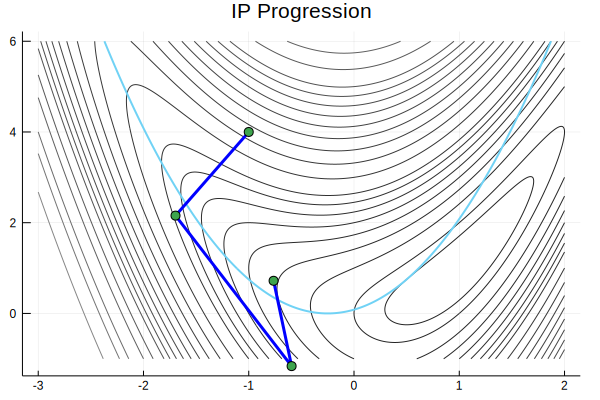

In [301]:
c_plot = contour(x,y,Z, levels=[4.5, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 34, 38, 45, 50, 60], 
    fill = false, color = :grays, legend = false)

contour!(c_plot, x, y, G, levels=[0], color=:isolum, linewidth=2)

x_vals = [x0';x1';x2';x3']
plot!(c_plot, x_vals[:,1], x_vals[:,2], linecolor=:blue, linewidth=3, marker=:circle, markersize=5,
    title="IP Progression")